### Preço de imóveis

**Objetivo:** estimar os preços de imóveis.
- Identificar aspectos que contribuem para a precificação dos imóveis.
- Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
- Precificar um imóvel novo.

In [349]:
import pandas as pd

df = pd.read_csv('Preços_de_casas.csv')
df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [351]:
df.shape

(1438, 8)

In [352]:
df.drop('Id', axis=1, inplace=True)

Existem alguns fatores que podem estar atrelados ao preço de vendas das casas.

Podemos ver o quão correlacionados estão com o preço.

Para medirmos essa correlação podemos utilizar a métrica "correlação" (corr).

In [353]:
# Cálculo da correlação
corr = df.corr()

# Exibindo a correlação do "preço_de_venda"
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

**Intensidade:** é a "força" da relação entre as variáveis medidas. Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.

**Direção:** É a natureza da relação entre as variáveis medidas. Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice versa.

Por exemplo, no caso do nosso dataset, a correlação linear entre *area_primeiro_andar* e *preco_de_venda* é uma **correlação positiva moderadamente forte (intensidade)**. Em outras palavras, a medida que a area do primeiro andar aumenta, o preço de vendas também tende a aumentar (direção).

<Axes: >

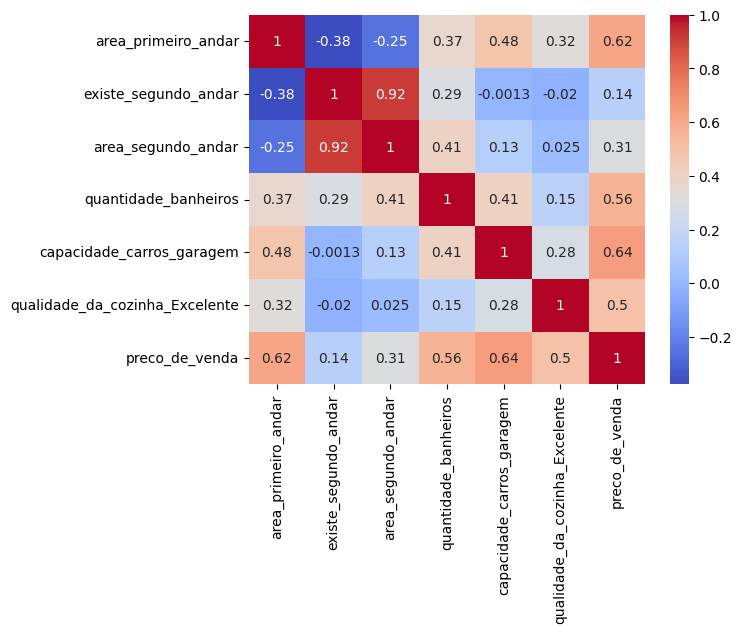

In [354]:
# Visualização da correlação
import seaborn as sns

sns.heatmap(corr, annot=True, cmap='coolwarm')

**OBS.** É importante notar que a **correlação não implica causalidade**, ou seja, não podemos afirmar que o aumento no preço de venda é causado especificamente pelo aumento na área do primeiro andar apenas com o uso da correlação, mas sim que esses fatores estão relacionados entre si.

Podemos visualizar essa relação entre as variáveis com um **Gráfico de Dispersão**.

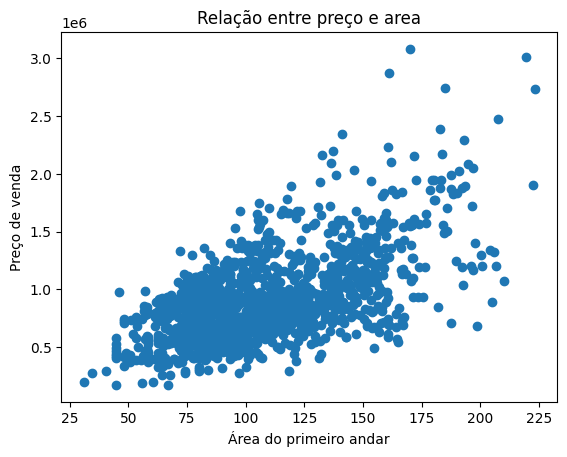

In [355]:
import matplotlib.pyplot as plt

# Gráfico de dispersão da área do primeiro andar com o preço de venda
plt.scatter(x=df['area_primeiro_andar'], y=df['preco_de_venda'])
plt.title("Relação entre preço e area")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")
plt.show()

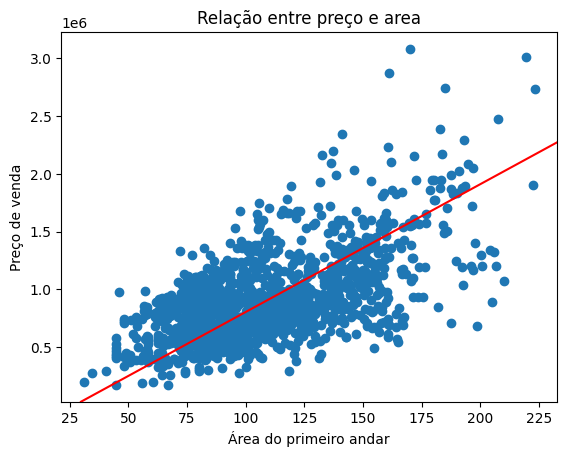

In [356]:
# Para exibir uma linha reta de forma manual no gráfico podemos utilizar a função "axline"
plt.scatter(x=df['area_primeiro_andar'], y=df['preco_de_venda'])
plt.title("Relação entre preço e area")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")

# Porém desta forma manual ainda não temos uma reta que mais se ajusta aos dados
plt.axline(xy1 = (50,250000), xy2=(190,1800000), color='red')

plt.show()

Para obtermos uma reta que melhor se ajuste aos dados, iremos utilizar a biblioteca *plotly* com a metodologia da **Regressão Linear**.

Essa reta é chamada de *Linha de Tendência*.

O parâmetro *trendline* é usado para adicionar uma linha de tendência (ou linha de regressão) ao gráfico de dispersão.

In [357]:
# Necessário instalar o plotly + statsmodels
import plotly.express as px

# Qual a reta que melhor se adequa a relação?
px.scatter(df, x='area_primeiro_andar', y='preco_de_venda',
           trendline='ols', # Isto serve para criar a linha que melhor se adequa à relação
           trendline_color_override='red') # Cor da melhor linha

A partir dessa representação, conseguimos explicar o preço de venda a partir da area do primeiro andar

A *area_primeiro_andar* é a váriavel independente ou explicativa (**X**).

O *preco_de_venda* é a variável dependente ou resposta (**Y**).

array([[<Axes: title={'center': 'preco_de_venda'}>]], dtype=object)

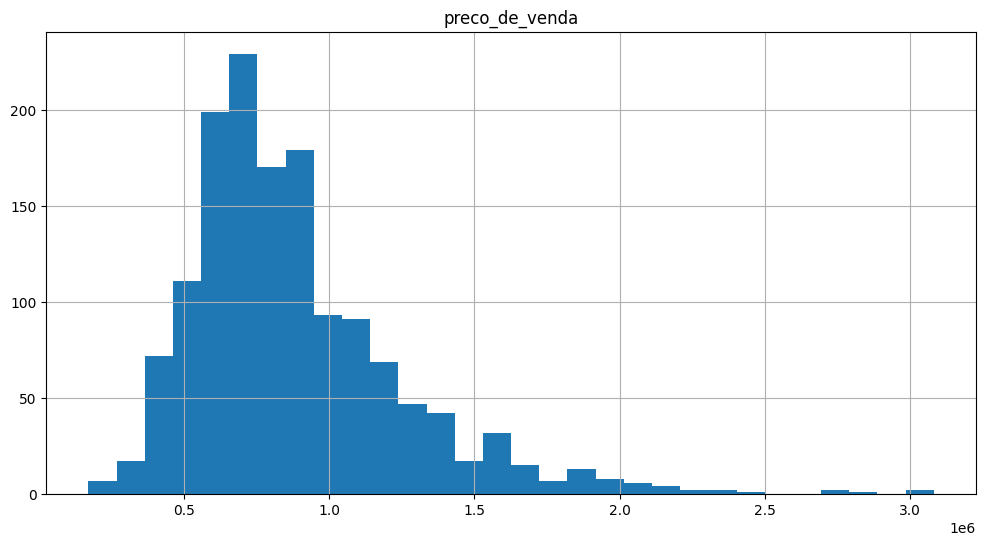

In [358]:
# Histograma para visualizar a distribuição dos valores de preço de venda
df.hist(column='preco_de_venda', bins=30, figsize=(12,6))

A maior parte dos valores das casas estão entre 0.6 e 0.9 aproximadamente.

Eixo x é o valor e o eixo y é a quantidade de ocorrências.

In [359]:
X = df.drop('preco_de_venda', axis=1)
y = df['preco_de_venda']

In [360]:
# Aplicando o split para separação dos dados entre treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [361]:
# Para ajustar o nosso primeiro modelo iremos utilizar a biblioteca statsmodels
from statsmodels.formula.api import ols

# Porém, antes de treinarmos o modelo, iremos criar um dataframe com os dados de treino
df_train = pd.DataFrame(X_train)
df_train['preco_de_venda'] = y_train

# Relação entre preço_de_venda e (~) area_primeiro_andar
model = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit() # Treinamos o modelo com o método fit()

In [362]:
# Visualizando os parametros
model.params

Intercept              145397.302896
area_primeiro_andar      6905.925181
dtype: float64

**O que esses valores significam?**

A linha **Intercept** significa o valor do *preço_de_venda* no caso da *area_primeiro_andar* for zero, onde no caso seria de R$ 145.397,30.

A linha da **area_primeiro_andar** significa que em média quando aumenta 1m² da área do primeiro andar espera-se que o valor da casa aumente no valor de R$ 6905.95.

Esses valores representam o efeito quantitativo da variável explicativa (area_primeiro_andar) sobre a variável de resposta (preço_de_venda).

In [363]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     573.7
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.21e-100
Time:                        23:26:07   Log-Likelihood:                -14117.
No. Observations:                1006   AIC:                         2.824e+04
Df Residuals:                    1004   BIC:                         2.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.454e+05   3